# Cheat Sheet

# Crear enviroments de anaconda desde un environment.yml file

- https://carpentries-incubator.github.io/introduction-to-conda-for-data-scientists/04-sharing-environments/index.html


Ejemplo del contenido del archivo de configuracion environment.yml:
```
name: ejemploenv

dependencies:
 - jupyterlab=1.0
 - matplotlib=3.1
 - pandas=0.24
 - scikit-learn=0.21
 - pip=19.1
 - pip:
   - kaggle==1.5
   - yellowbrick==0.9
```

To create the environment:
```
conda env create --file environment.yml
```

To create the environment in you proyect folder:
```
conda env create --file environment.yml --prefix ./env
```



# Agregando y eliminando kernels de jupyter

#### List all kernels and grap the name of the kernel you want to remove
```
jupyter kernelspec list
```

#### Add kernel
```
conda activate ejemploenv
pip install ipykernel
python -m ipykernel install --user --name ejemploenv --display-name "Mi env de ejemplo"
```

#### Remove it
```
jupyter kernelspec remove ejemploenv
```

- https://github.com/ResidentMario/missingno

In [ ]:
!pip install pandas -U -q

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/amiune/freecodingtour/main/cursos/espanol/datascience/data/diabetes/diabetes_train_info.csv')

In [4]:
def glimpse(df):
    print(f"Rows: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
    names = []
    types = []
    values = []
    for col in df.columns:
        names.append(col)
        types.append(df[col].dtype) 
        values.append(np.array2string(df[col].sample(n=5).values,separator=', '))
    ret = pd.DataFrame({"Names":names,"Types":types,"Values":values})
    return ret

In [8]:
df.pipe(glimpse)

Rows: 60000
Columns: 5


,Names,Types,Values
0,id,int64,"[ 9051, 7777, 64238, 48207, 49535]"
1,edad,int64,"[16045, 56, 18196, 14584, 21218]"
2,altura,int64,"[145, 165, 163, 156, 169]"
3,peso,float64,"[82., 92., 85., 57., nan]"
4,sexo,object,"['f', 'm', 'masculino', 'm', 'masculino']"


In [38]:
!pip install missingno -U -q

<Axes: >

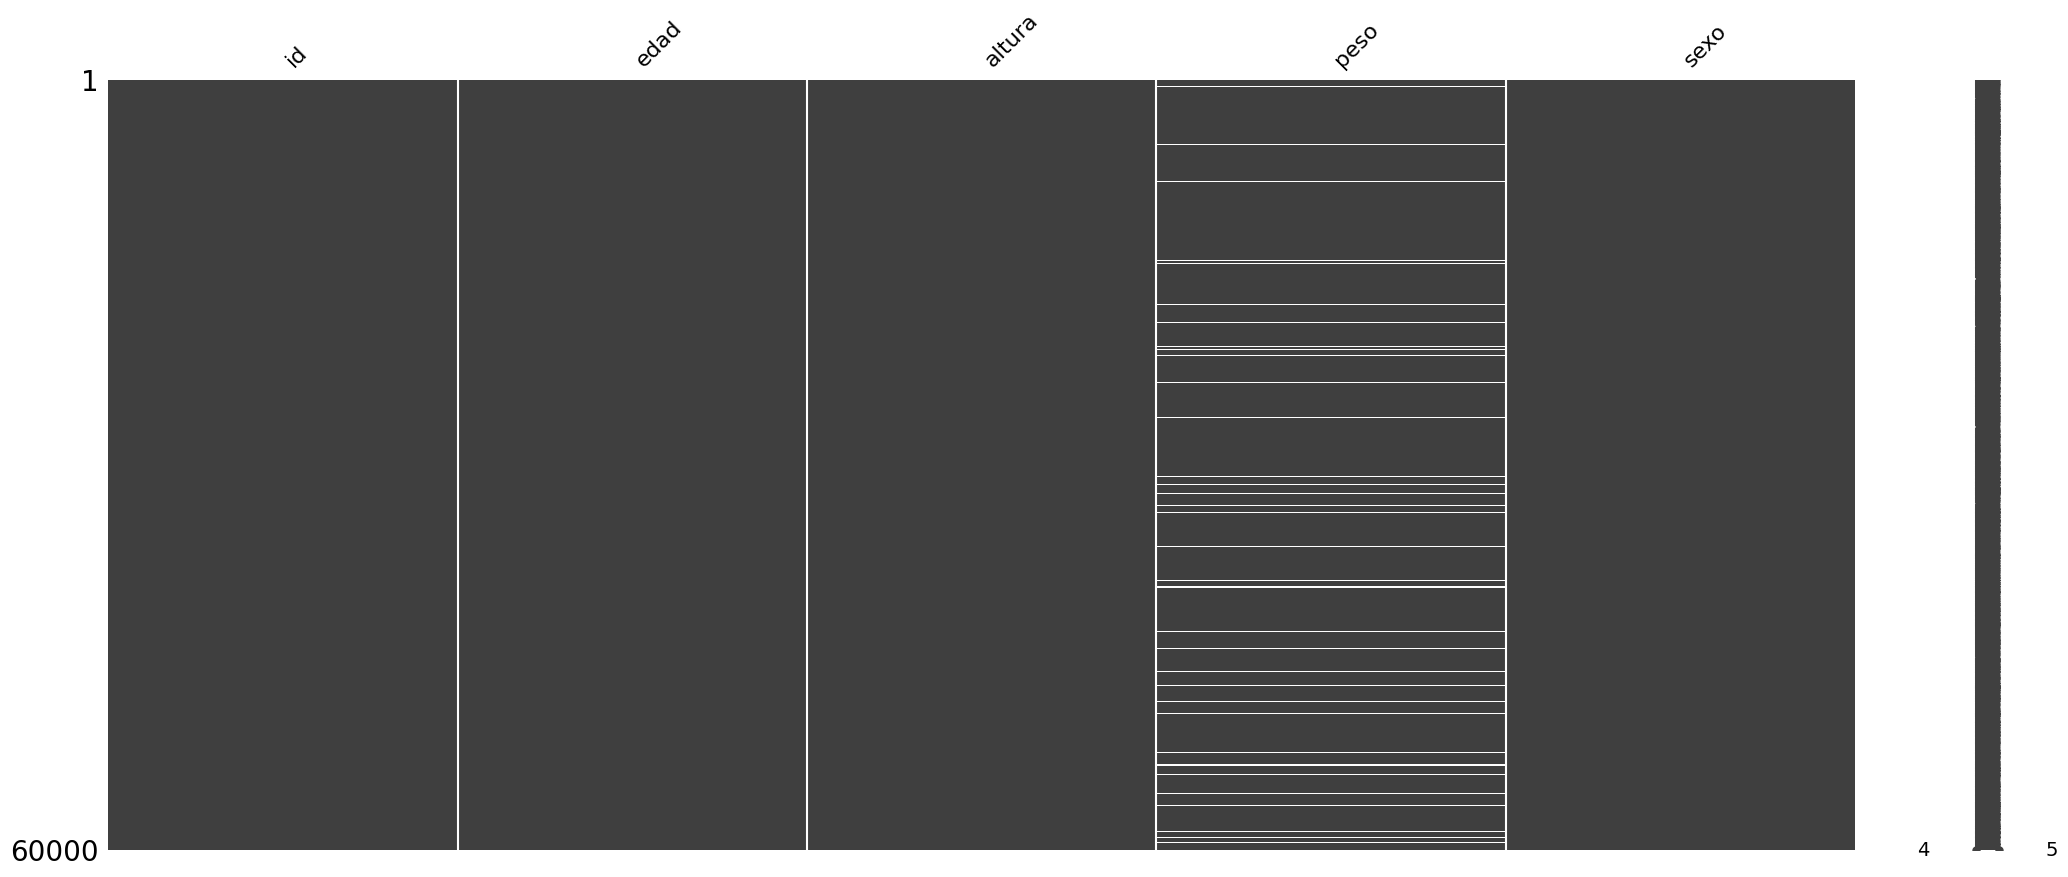

In [9]:
import missingno as msno
msno.matrix(df)

# Automatic Data Preprocessing

- Ver: https://pycaret.gitbook.io/docs/get-started/preprocessing

In [ ]:
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def data_processing(df, target_col="target"):
    # TODO: save data processing to replicate on test
    # Remove ID columns
    for c in df.columns:
        if not is_float_dtype(df[c]):
            if df[c].nunique() == len(df[c]):
                df = df.drop(c, axis=1)
    
    # Fill Missing Values and Scale
    scaler = StandardScaler()
    for c in df.columns:
        if c != target_col:
            if is_numeric_dtype(df[c]):
                df[c] = df[c].fillna(df[c].mean())
                df[c] = scaler.fit_transform(df[[c]])
            else:
                df[c] = df[c].fillna(df[c].mode())
                df = pd.get_dummies(df, columns=[c], drop_first=True, dtype=int)

    # Identify the target column
    X_train = df.loc[:, df.columns != target_col]
    y_train = df.loc[:, target_col]
    return X_train, y_train

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/datascience/datascience.html)